In [ ]:
#importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import requests
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
!pip install mlxtend

##Introducción
**Contexto comercial**
Cada año mueren más personas por enfermedades cardiovasculares (ECV) que por cualquier otra causa.

Las enfermedades cardiovasculares (ECV) son un grupo de desórdenes del corazón y de los vasos sanguíneos, entre los que se incluyen: la cardiopatía coronaria;
las enfermedades cerebrovasculares;
las arteriopatías periféricas; entre otras.
El riesgo de padecer una ECV aumenta por una alimentación poco saludable, la cual se caracteriza por un bajo consumo de frutas y verduras y un consumo elevado de sal, azúcares y grasas. Una alimentación poco saludable contribuye a la obesidad y el sobrepeso, los cuales a su vez son factores de riesgo para las ECV.
Las personas que no hacen actividad física suficiente tienen entre un 20% y un 30% más de probabilidades de morir prematuramente que aquellas que hacen actividad física suficiente. Por tanto, la inactividad física es un factor de riesgo clave para la aparición de las ECV, cáncer y diabetes.
Se estima que la exposición a productos derivados del tabaco es responsable del 10% de todas las muertes ocasionadas por ECV.

**Motivación y audiencia**
El manejo de uno de los mayores problemas de salud pública, sin lugar a dudas, significa un gran desafío tanto a nivel local como global. Existe una gran diferencia en relación al gasto de recursos tanto materiales como humanos y tecnicos, dependiendo del momento (etapa de prevención vs trataminto y rehabilitacion) en el que se haga la pesquiza y la magnitud de la población a la que podemos abarcar. En este sentido las herramientas con las cuales contamos actualmente, permitirían intervenir de manera más precoz y llegar a una mayor población objetivo. En ese esenario los organismos encargados de la gestion de dichos recursos se beneficiarían al contar con herramientas de apoyo a la toma de estas decisiones.

**Problema a resolver**
Diseñar un sistema que permita predecir si una persona tendrá o no enfermedad cardiovascular (ECV).

**Problema comercial:**
Manipular los datos disponibles y hacer visualizaciones para responder a preguntas cómo:
¿Cómo podemos predecir la aparición de ECV considerando los factores de riesgo?
¿Cuáles son los factores de riesgo más importantes en la aparición de ECV?
¿En quienes es más prevalente, según género, edad, hábitos?,¿Quienes serían los grupos de riesgo?




##Data Acquisition

El conjunto de datos consta de 70.000 registros de datos de pacientes con 12 características, como la edad, el género, la presión arterial sistólica, la presión arterial diastólica, etc. La variable target "cardio" es igual a 1, cuando el paciente tiene enfermedad cardiovascular, y es 0, si el paciente está sano. El dataset está disponible en Kaggle.

In [ ]:
url= "https://debug.jfhack.com/datasets/cardio_train.csv"
df= pd.read_csv(url, sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


##EDA

Si bien es parte de data wrangling, revisaremos rápidamente si hay nulos.

In [ ]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

No hay datos nulos.

In [ ]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Columnas:

1.   age(edad), variable discreta, int (días)
2.   gender(género), variable categórica nominal, int (1: mujer, 2: hombre)
3.   height(estatura), variable continua, int (cms)
4.   weight(peso), variable continua, int (kgs)
5.   ap_hi(presión sistólica), variable continua, int (mmHg)
6.   ap_lo(presión diastólica), variable continua, int (mmHg)
7.   cholesterol(colesterol), variable categórica ordinal, int (1: normal, 2: arriba de lo normal, 3: muy arriba de lo normal)
8.   gluc(glucosa),variable categórica ordinal, int (1: normal, 2: arriba de lo normal, 3: muy arriba de lo normal)
9.   smoke(tabaquismo), variable categórica nominal, int (binaria, 1:sí, 2: no)
10.  alco(consumo de alcohol), variable categórica nominal, int (binaria, 1:presencia, 0: ausencia)
11.  active(actividad), variable categórica nominal, int (binaria, 1:presencia, 0: ausencia)
12.  cardio(ECV), variable target, int (binaria, 1:presencia, 0: ausencia)

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Se revisó que todos los valores únicos de las variables categóricas codificadas estuvieran correctos.

Conclusiones:
*   La mayoría de los casos son mujeres con un mean 1.34.
*   La edad ['age'] está expresada en días. La edad mínima es de 10.798 días (aproximadamente 29,6 años) y la máxima es de 23.713días (aproximadamente 65 años). El promedio de edad es 53 años aproximadamente. Una idea es expresar esta columna en años para visualizar.
*   Hay algunas alturas y pesos que parecen ser atípicos (mínimo de 55 cm y máximo de 250 cm para la altura ['height']; mínimo de 10 kg y máximo de 200 kg para el peso ['weight']).
*   En cuanto a presión arterial, hay valores negativos y valores extremadamente altos que son claramente errores o valores atípicos. Una presión arterial normal es < 120/80 y crisis de hipertensión es >180/120. En este caso, hay incluso valores de 16.000/11.000. Es necesario limpiar o filtrar estos datos antes de realizar un análisis más profundo.
*   En relación al colesterol y glucosa ['cholesterol', 'gluc']: La mayoría de las personas tienen niveles normales de colesterol y glucosa, pero es necesario conocer sus proporciones.
*   En cuanto a consumo de tabaco, alcohol y realizar actividad física ['smoke', 'alco', 'active'], la mayoría de las personas no fuman, no consumen alcohol y son físicamente activas.
*   Finalmente, la Enfermedad cardiovascular o ECV ['cardio']: El dataset está bastante equilibrado en cuanto a la presencia (1) y ausencia (0) de enfermedades cardiovasculares. Es necesario revisar esta distribución por sexo y edad.


Modificaré columnas para mejorar la visualización

In [ ]:
df["age_years"]=(df["age"]/365).astype(int) #Debido a que la edad estaba en días, se creó una nueva columna "age_years" con los datos en años para poder calcular promedios, etc.
df=df.rename(columns={"cholesterol":"chol"}) #Se renombró esta columna para hacerla más corta
df["height_mts"]=df["height"]/100   #Debido a que la altura estaba en cms, se creó una nueva columna "height_mts" con los datos en metros para poder calcular promedios, etc.
df["imc"]= df["weight"]/(df["height_mts"]**2) #Se creó la columna 'imc' para tener este dato

In [ ]:
#crearé columnas con los nombres de las categorías para facilitar su visualización
df['cat_gender'] = df['gender'].replace({1: 'Mujer', 2: 'Hombre'})
df['cat_cardio'] = df['cardio'].replace({0: 'Sin_ECV', 1: 'Con_ECV'})
bins = [25, 31, 36, 41, 46, 51, 56, 61, 66, 70]
labels = ['25-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70']
df['cat_years'] = pd.cut(df['age_years'], bins=bins, labels=labels, right=False)

In [ ]:
# Filtraré los datos eliminando atipicos de presión
df_filtro_1 = df[
    (df['ap_hi'] > 0) & (df['ap_hi'] < 250) &
    (df['ap_lo'] > 0) & (df['ap_lo'] < 200) &
    (df['ap_hi'] > df['ap_lo'])
]

# Revisaré la diferencia entre los registros
original_reg = len(df)
filtered_reg = len(df_filtro_1)

original_reg, filtered_reg, original_reg - filtered_reg

(70000, 68709, 1291)

Disminuyeron 1291 resgistros

###Análisis univariado

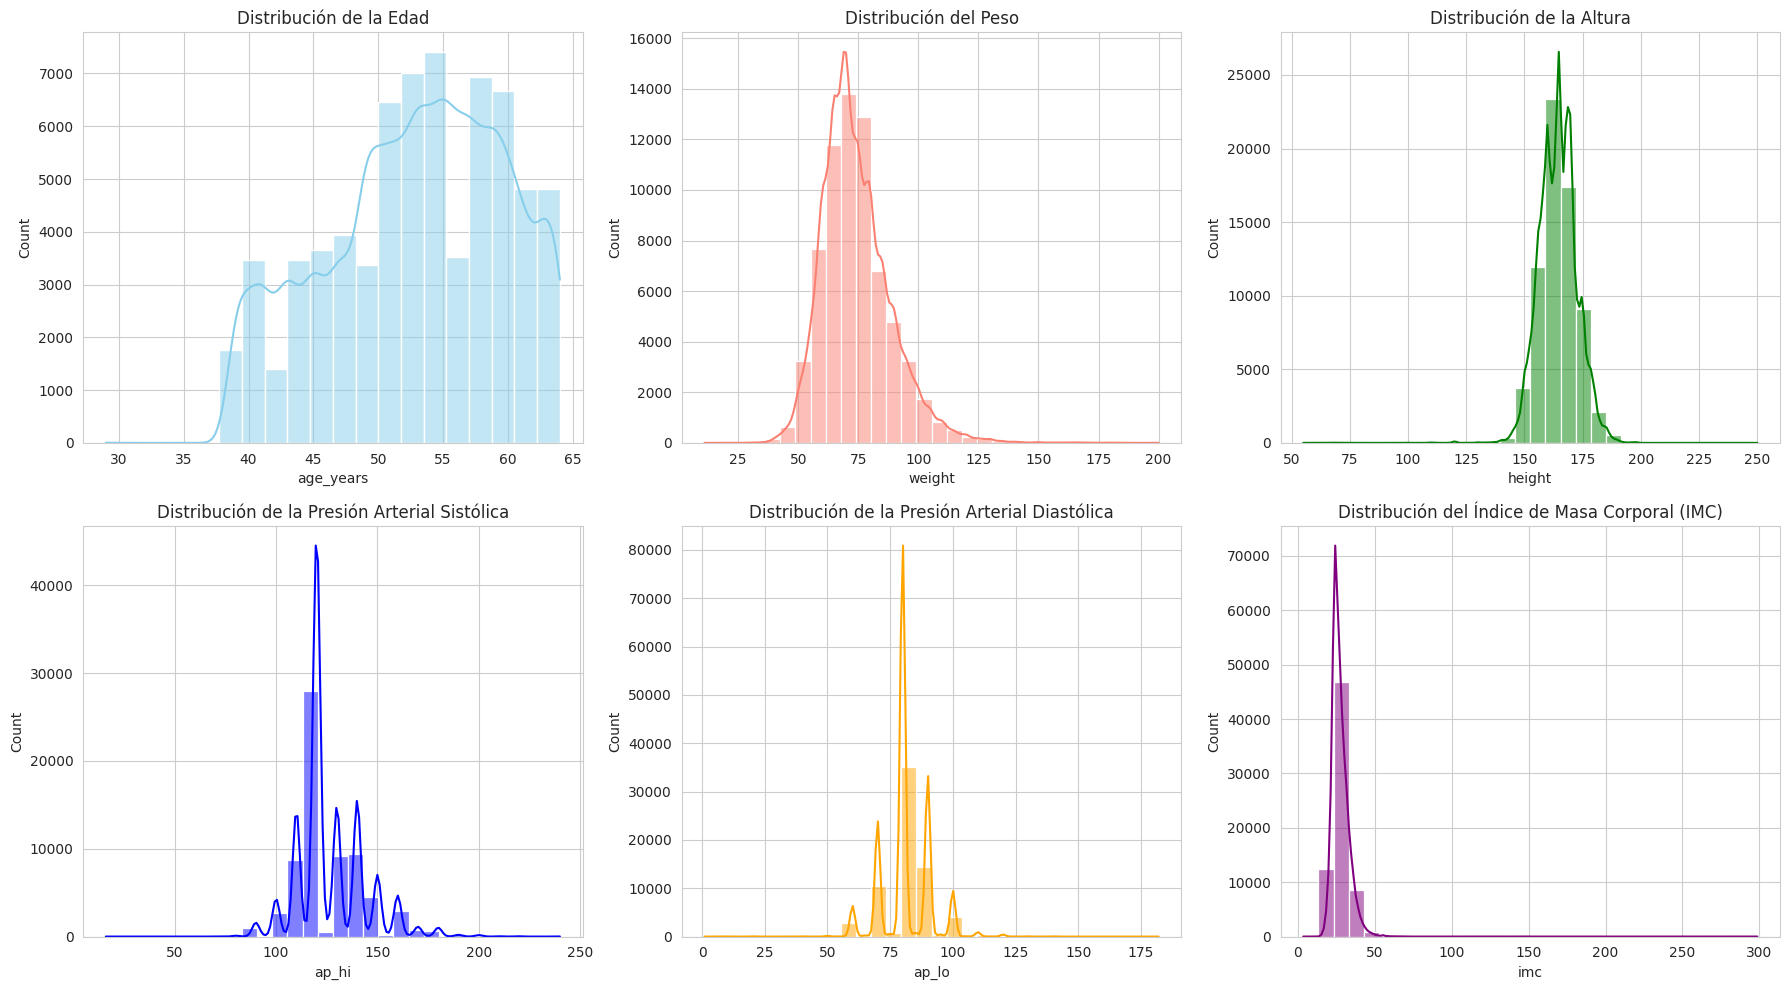

In [ ]:
# Estableciendo el estilo de Seaborn
sns.set_style("whitegrid")

# Creando una figura con múltiples subplots (histogramas)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Histograma de la edad en años
sns.histplot(df_filtro_1['age_years'], kde=True, ax=axes[0, 0], color='skyblue', bins=20)
axes[0, 0].set_title('Distribución de la Edad')

# Histograma del peso
sns.histplot(df_filtro_1['weight'], kde=True, ax=axes[0, 1], color='salmon', bins=30)
axes[0, 1].set_title('Distribución del Peso')

# Histograma de la altura
sns.histplot(df_filtro_1['height'], kde=True, ax=axes[0, 2], color='green', bins=30)
axes[0, 2].set_title('Distribución de la Altura')

# Histograma de la presión arterial sistólica (ap_hi)
sns.histplot(df_filtro_1['ap_hi'], kde=True, ax=axes[1, 0], color='blue', bins=30)
axes[1, 0].set_title('Distribución de la Presión Arterial Sistólica')

# Histograma de la presión arterial diastólica (ap_lo)
sns.histplot(df_filtro_1['ap_lo'], kde=True, ax=axes[1, 1], color='orange', bins=30)
axes[1, 1].set_title('Distribución de la Presión Arterial Diastólica')

# Histograma del IMC
sns.histplot(df_filtro_1['imc'], kde=True, ax=axes[1, 2], color='purple', bins=30)
axes[1, 2].set_title('Distribución del Índice de Masa Corporal (IMC)')

# Ajustando el layout
plt.tight_layout()
plt.show()

El principal grupo es entre 35 y 64 años, existen muy pocos datos sub 35 y están alejados del mínimo.
En cuanto a altura y peso, ambos tienen en primera instancia una curva normal. La mayoría tiene una altura entre 150-180 cm, con un promedio de 170 cm y un peso entre 50-110kgs, con un promedio de 75. Sin embargo, es posible ver valores extremos presentes que aumantan la varianza.
Luego del filtrado, la presion arterial sistólica se centra entre los 100 y 160 aproximadamente, la presión arterial disatólica lo hace entre los 50 y 100, pero ambas, aunque principalmente la disatólica tienen valores extremos aún.
Al revisar por IMC, o sea, la relación del peso y talla, podemos visualizar existen datos extremos que llevan al IMC hasta 300. Es importante mencionar que un IMC normal es <25, sobrepeso es >25 pero <30 y obesidad>30, por ende 200 es muy extremo. Se considera como outliers y se estima pertinente hacer el corte en IMC>50. Visualizaremos en boxplot edad e imc para ver su distribución.



Text(0.5, 1.0, 'Distribución por edad')

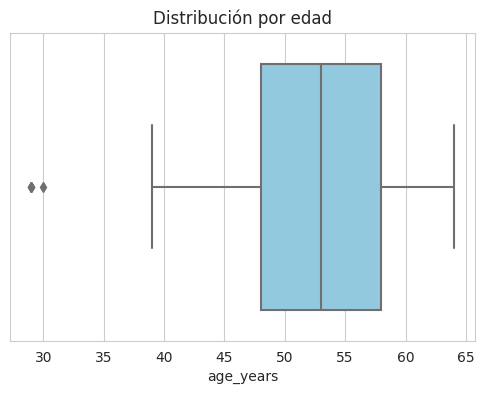

In [ ]:
fig,ax = plt.subplots(figsize =(6, 4))
sns.boxplot(data=df_filtro_1, x= 'age_years', color= "skyblue")
ax.set_title("Distribución por edad")

<Axes: xlabel='imc'>

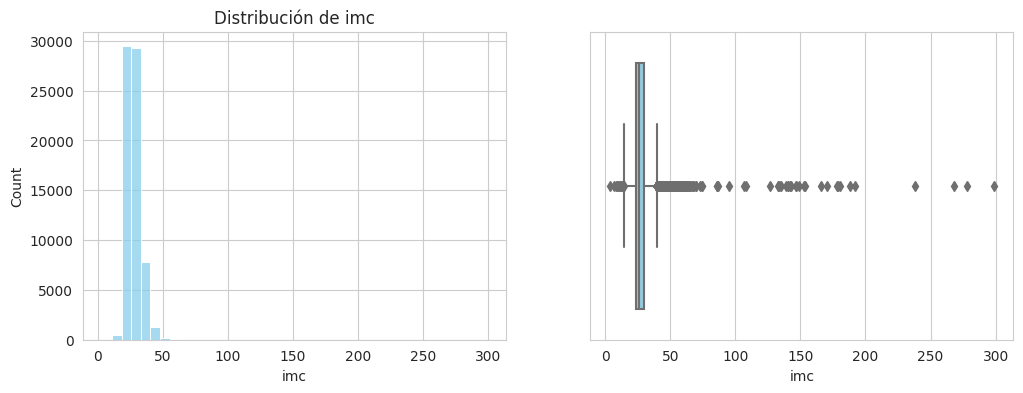

In [ ]:
fig, axes= plt.subplots(nrows=1, ncols= 2, figsize=(12,4))
sns.histplot(data=df_filtro_1, x='imc', color='skyblue', bins=40, ax= axes[0])
axes[0].set_title("Distribución de imc")

sns.boxplot(data=df_filtro_1, x= 'imc', color= "skyblue", ax=axes[1])


Ambos poseen datos muy alejados del grupo, los tomo como outliers despúes de haber realizado todo el EDA, pero para fines de la presentación los elimino desde ya para no repetir gráficos de antes y después.

In [ ]:
#Filtraré para mantener a los mayores de 35 años
df_filtro_2=df_filtro_1[df_filtro_1["age_years"]>=35]

# Revisaré la diferencia entre los registros
original_2 = len(df_filtro_1)
filtered_2 = len(df_filtro_2)

original_2, filtered_2, original_2 - filtered_2 #Debería bajar en 4 registros

(68709, 68705, 4)

In [ ]:
#Filtraré para mantener a los IMC>15 y <45
df_filtro_3=df_filtro_2[
    (df_filtro_2['imc']>15) &
    (df_filtro_2['imc']<45)]

# Revisaré la diferencia entre los registros
original_3 = len(df_filtro_2)
filtered_3 = len(df_filtro_3)

original_3, filtered_3, original_3 - filtered_3

(68705, 68101, 604)

###Análisis bivariado y multivariado

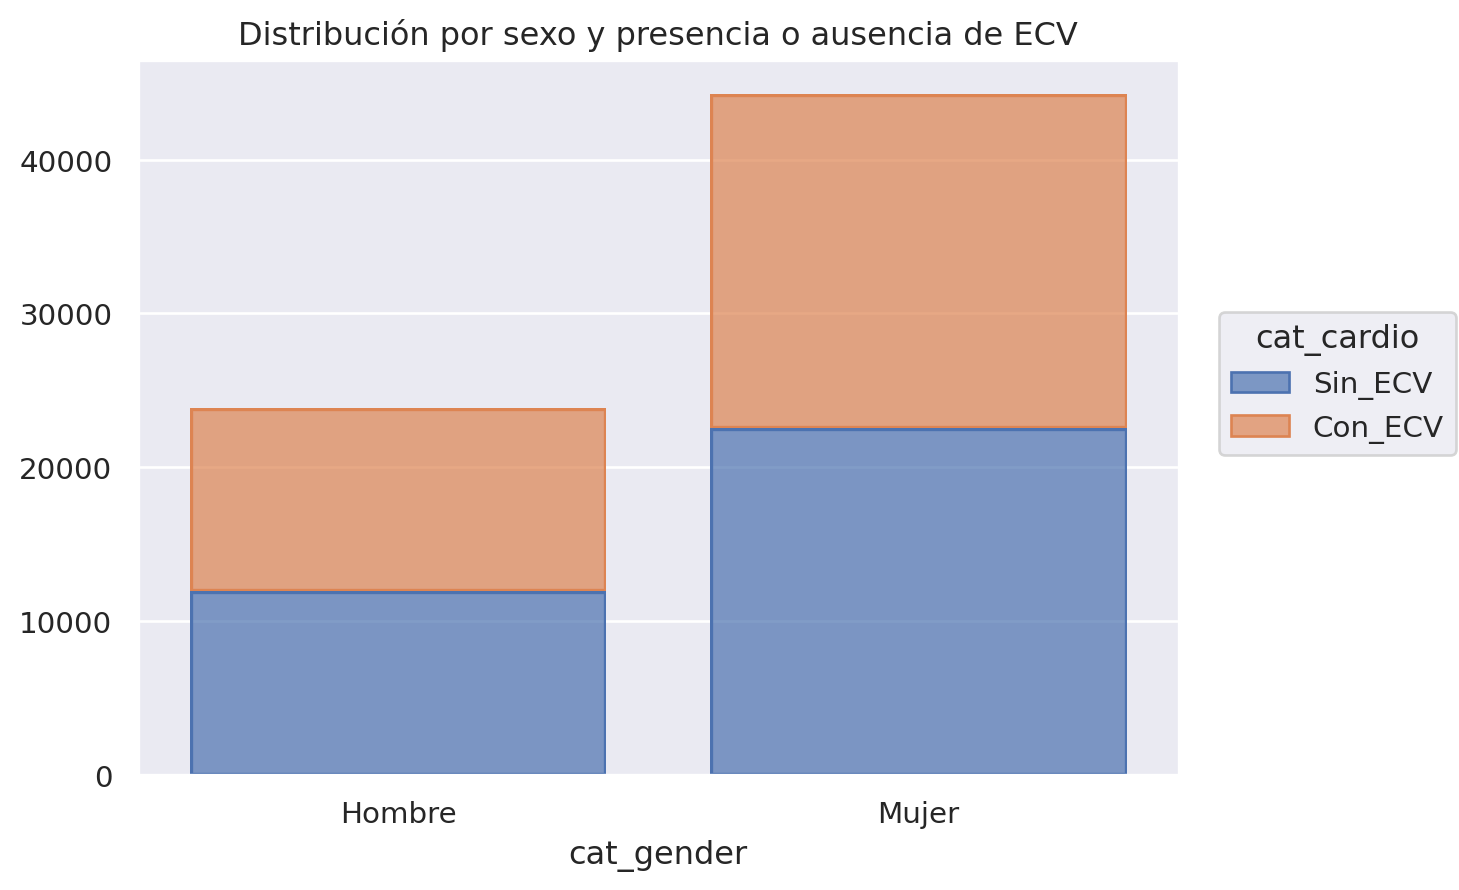

In [ ]:
(so.Plot(df_filtro_3, x="cat_gender", color="cat_cardio").add(so.Bar(), so.Count(), so.Stack())
.label(title= 'Distribución por sexo y presencia o ausencia de ECV'))

Las mujeres son casi el doble que los hombres, pero la distribución de la enfermedad entre ambos sexos es proporcional.

Text(0, 0.5, 'Número de Personas')

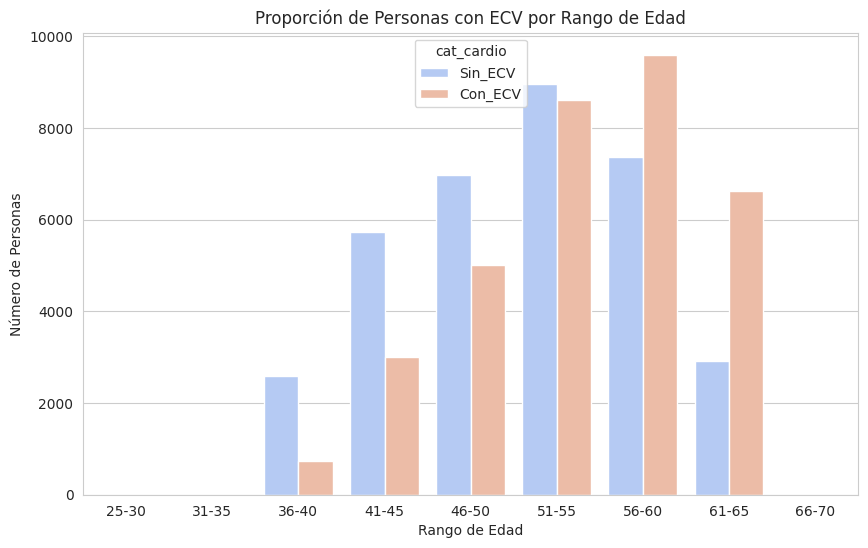

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras para la proporción de personas con ECV por rango de edad
sns.countplot(data=df_filtro_3, x='cat_years', hue='cat_cardio', palette="coolwarm")
ax.set_title('Proporción de Personas con ECV por Rango de Edad')
ax.set_xlabel('Rango de Edad')
ax.set_ylabel('Número de Personas')

El riesgo de ECV parece aumentar con la edad. Los grupos de edad más jóvenes (39-45 y 46-50) tienen una menor proporción de personas con ECV en comparación con los grupos de edad más avanzada (56-60 y 61-65), donde la proporción de personas con ECV es mayor.
En particular, las personas en el rango de edad de 56-60 y 61-65 años muestran una proporción significativamente más alta de ECV en comparación con las personas más jóvenes.

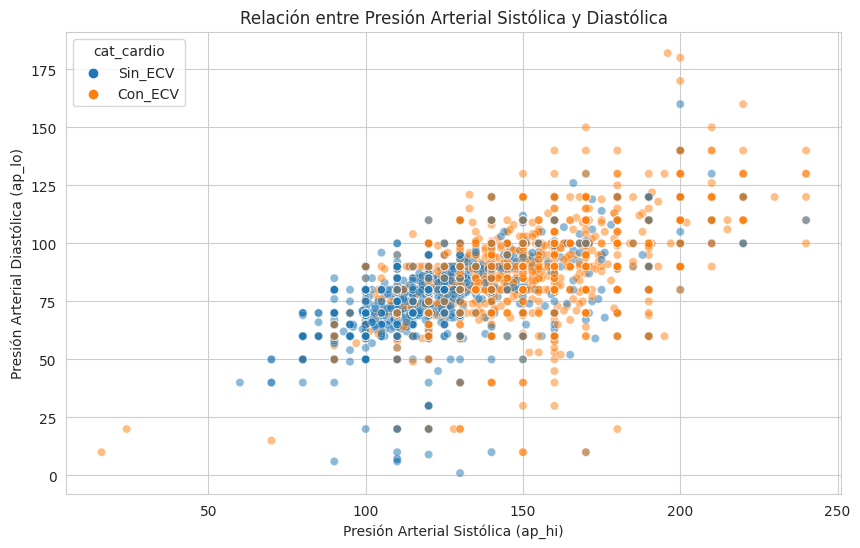

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtro_3, x='ap_hi', y='ap_lo', hue='cat_cardio', alpha=0.5)
plt.title('Relación entre Presión Arterial Sistólica y Diastólica')
plt.xlabel('Presión Arterial Sistólica (ap_hi)')
plt.ylabel('Presión Arterial Diastólica (ap_lo)')
plt.show()

Hay una relación positiva entre la presión arterial sistólica y diastólica, lo que es esperado. A medida que una aumenta, generalmente la otra también lo hace.
Las personas con valores más altos de ap_hi y ap_lo parecen tener una mayor propensión a tener ECV.
Existe una concentración notable de individuos con ECV en el rango de ap_hi de 140 a 180 y ap_lo de 90 a 110, lo que está generalmente considerado como hipertensión.

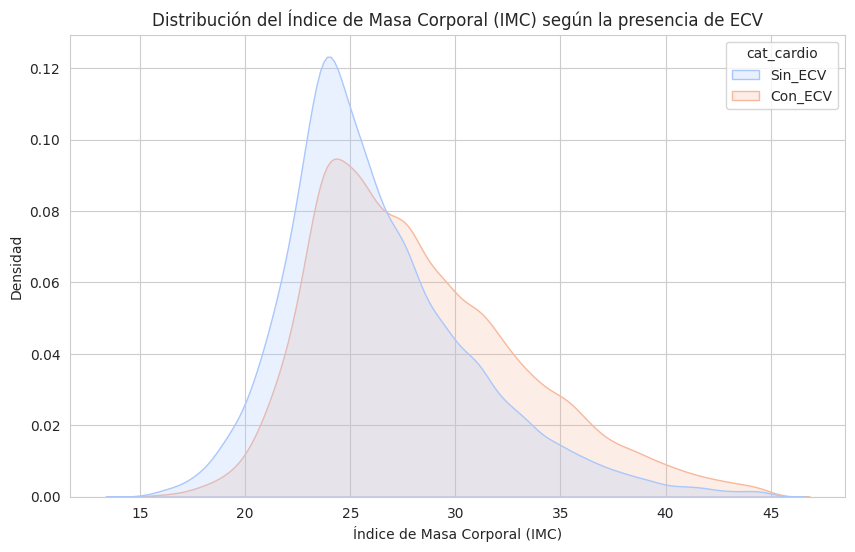

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_filtro_3, x='imc', hue='cat_cardio', fill=True, common_norm=False, palette="coolwarm")
plt.title('Distribución del Índice de Masa Corporal (IMC) según la presencia de ECV')
plt.xlabel('Índice de Masa Corporal (IMC)')
plt.ylabel('Densidad')
plt.show()

La distribución del IMC para aquellos individuos sin ECV tiene un pico alrededor del valor 25, que está en el límite entre un peso normal y el sobrepeso.
Por otro lado, la distribución del IMC para aquellos con ECV está desplazada hacia la derecha, lo que indica un IMC más alto en promedio. Su pico está alrededor del valor 27-28, que se clasifica como sobrepeso.
Esta observación sugiere que un IMC más alto podría estar asociado con un mayor riesgo de ECV.

<ipython-input-19-eb08bdda81ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro_3['cat_imc'] = pd.cut(df['imc'], bins=bins, labels=labels, right=True)


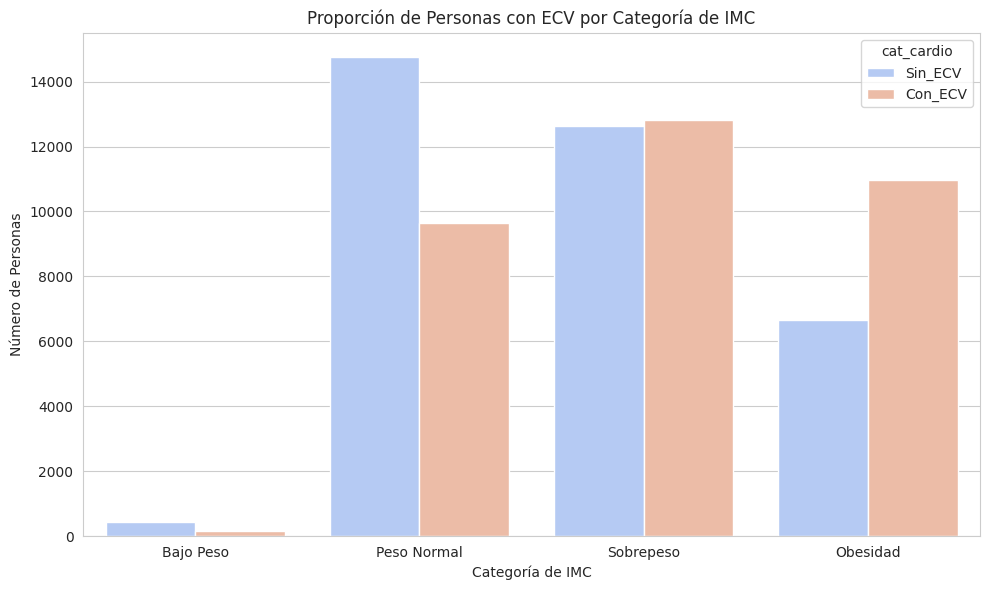

In [ ]:
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Bajo Peso', 'Peso Normal', 'Sobrepeso', 'Obesidad']
df_filtro_3['cat_imc'] = pd.cut(df['imc'], bins=bins, labels=labels, right=True)

# Gráfico de barras para la proporción de personas con ECV por categoría de IMC
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtro_3, x='cat_imc', hue='cat_cardio', palette="coolwarm", order=labels)
plt.title('Proporción de Personas con ECV por Categoría de IMC')
plt.xlabel('Categoría de IMC')
plt.ylabel('Número de Personas')
plt.tight_layout()
plt.show()

El gráfico muestra la proporción de personas con enfermedades cardiovasculares según las categorías de Índice de Masa Corporal:

Bajo Peso: Aquellos que tienen bajo peso muestran una menor proporción de ECV.
Peso Normal: Las personas con un IMC normal también tienen una menor proporción de ECV en comparación con las categorías de sobrepeso y obesidad.
Sobrepeso: La proporción de personas con ECV aumenta en el grupo de sobrepeso.
Obesidad: La categoría de obesidad muestra la proporción más alta de individuos con ECV.

Text(0, 0.5, 'Número de Pacientes')

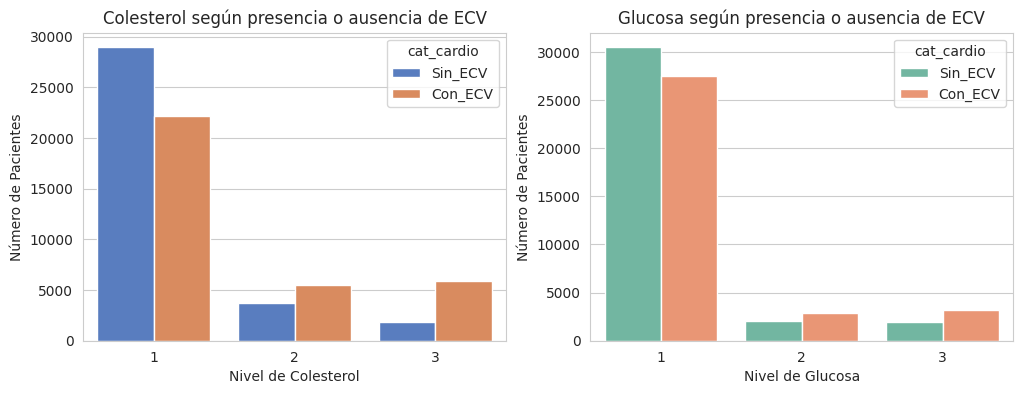

In [ ]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize =(12, 4))
sns.countplot(x='chol', hue='cat_cardio', data=df_filtro_3, ax= axes[0], palette='muted')
axes[0].set_title("Colesterol según presencia o ausencia de ECV")
axes[0].set_xlabel('Nivel de Colesterol')
axes[0].set_ylabel('Número de Pacientes')

sns.countplot(x='gluc', hue='cat_cardio', data=df_filtro_3, ax= axes[1], palette='Set2')
axes[1].set_title("Glucosa según presencia o ausencia de ECV")
axes[1].set_xlabel('Nivel de Glucosa')
axes[1].set_ylabel('Número de Pacientes')

En cuanto al Colesterol, se observa que a medida que aumentan los niveles de colesterol, la proporción de pacientes con enfermedades cardiovasculares también aumenta.
En relación a la Glucosa, aunque la tendencia no es tan pronunciada como en el colesterol, aún podemos observar que los pacientes con niveles más altos de glucosa tienden a tener una mayor prevalencia de enfermedades cardiovasculares en comparación con aquellos con niveles normales.

###Conclusiones de EDA

Las mujeres son casi el doble que los hombres, pero la distribución de la población según edad es proporcional, al igual que la presencia o ausencia de la enfermedad. El principal grupo es entre 35 y 64 años. La mayoría tiene una altura entre 150-180 cm y un peso entre 50-110kgs. La presion arterial sistólica se centra entre los 100 y 160 aproximadamente, la presión arterial disatólica lo hace entre los 50 y 100. En cuanto al colesterol y la glucosa, el grupo que posee niveles normales es el más predominante y a medida que aumentan los niveles a sobre lo normal o muy sobre lo normal, aumenta la presencia de enfermedades cardiovasculares.
El grupo que realiza actividad física es significativamente mayor al que no lo realiza, pero entre ellos, las proporciones de presencia o ausencia de ECV, difieren levemente, siendo más presente en el grupo que no realiza actividad física.Mayoritariamente las personas no consumen tabaco ni alcohol. El riesgo de ECV parece aumentar con la edad. Las personas con valores más altos de ap_hi y ap_lo parecen tener una mayor propensión a tener ECV. Un IMC más alto podría estar asociado con un mayor riesgo de ECV. Niveles elevados de colesterol y glucosa en la sangre se asocian con un mayor riesgo de enfermedades cardiovasculares.

##Data Wranglig

Esta fase está muy ligada al EDA, por lo tanto hasta aquí ya hemos realizado:


*   Corroboración de la ausencia de datos nulos
*   Eliminación de outliers principalmente atribuidos a mediciones erroneas
*   Creación de columnas nuevas, incluidas variables sintéticas, principalmente para análisis y visualización







###Enriquecimiento con API

Dado que he incorporado una columna de IMC que ya limpié, decidí incorporar desde una API de la OMS, una columna con promedios de IMC por género y país, como el dataset en de EEUU, elegí ese páis para comparar el dato con su promedio.
En la página de WHO (OMS), existe una sección para enlace con sus API. Al protocolo se ingresa desde acá: https://www.who.int/data/gho/info/gho-odata-api
El json de BMI contiene una lista con 26115 valores, por ende la llamada la realicé filtrando "filter=SpatialDim eq 'USA' and TimeDim eq 2016 and Dim1 ne 'BTSX'", lo que hace la solicitud por país USA, año 2016 y, género femenino y masculino.

In [ ]:
#Con el url de la llamada definido, la realizo

url = "https://apps.who.int/gho/athena/api/GHO/NCD_BMI_MEAN.json?profile=simple&filter=COUNTRY:USA;YEAR:2016"
#url = "https://debug.jfhack.com/datasets/NCD_BMI_MEAN.json"

respuesta= requests.get(url)
respuesta

<Response [200]>

In [ ]:
datos= respuesta.json().get('value')

In [ ]:
datos= list(filter(lambda d: d.get("dim").get("SEX") != 'Both sexes', respuesta.json().get('fact')))
datos    #realizo una función para poder luego mapearla y obtener sólo los datos de IMC y género

[{'dim': {'PUBLISHSTATE': 'Published',
   'YEAR': '2016',
   'SEX': 'Female',
   'COUNTRY': 'United States of America',
   'AGEGROUP': '18+  years',
   'GHO': 'Mean BMI (kg/m&#xb2;) (age-standardized estimate)',
   'REGION': 'Americas'},
  'Value': '28.9 [28.3-29.5]'},
 {'dim': {'YEAR': '2016',
   'SEX': 'Male',
   'GHO': 'Mean BMI (kg/m&#xb2;) (age-standardized estimate)',
   'REGION': 'Americas',
   'COUNTRY': 'United States of America',
   'AGEGROUP': '18+  years',
   'PUBLISHSTATE': 'Published'},
  'Value': '28.8 [28.3-29.4]'}]

In [ ]:
def datos_imc (obj):    #realizo una función para poder luego mapearla y obtener sólo los datos de IMC y género
  return dict(sex=obj.get("dim").get("SEX"), BMI=float(obj['Value'].split(" ")[0]))

In [ ]:
datos_filtrados= list(map(datos_imc, datos)) #mapeo utilizando la función datos_imc

api_df= pd.DataFrame(datos_filtrados) #generación del dataframe

api_df['cat_gender']= api_df['sex'].replace({'Female': 'Mujer', 'Male': 'Hombre'})#agrego la columna llave

api_df.drop('sex', axis=1, inplace=True) #borro la columna sex para que sólo queden

df_new=pd.merge(left=df_filtro_3,right=api_df, on ='cat_gender',how='inner')#realizo el merge

df_new.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,chol,gluc,smoke,...,active,cardio,age_years,height_mts,imc,cat_gender,cat_cardio,cat_years,cat_imc,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,...,1,0,50,1.68,21.967120,Hombre,Sin_ECV,46-50,Peso Normal,28.8
1,3,17623,2,169,82.0,150,100,1,1,0,...,1,1,48,1.69,28.710479,Hombre,Con_ECV,46-50,Sobrepeso,28.8
2,12,22584,2,178,95.0,130,90,3,3,0,...,1,1,61,1.78,29.983588,Hombre,Con_ECV,61-65,Obesidad,28.8
3,16,18815,2,173,60.0,120,80,1,1,0,...,1,0,51,1.73,20.047446,Hombre,Sin_ECV,51-55,Peso Normal,28.8
4,18,14791,2,165,60.0,120,80,1,1,0,...,0,0,40,1.65,22.038567,Hombre,Sin_ECV,36-40,Peso Normal,28.8


In [ ]:
df_new.to_csv('df_new.csv', index=False)

###Nuevas preguntas de API

¿Cuán distante se encuentra el promedio de IMC del conjunto de datos, de los promedios entregados por la API?

¿Cuanta diferencia existe entre los valores según género?

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
mean_imc = df_new['imc'].mean()

In [ ]:
from plotly.graph_objs import layout
fig= px.histogram(df_new, x='imc', nbins=30, color= 'cat_gender', title="Distribución de IMC y promedios de la muestra vs OMS")

fig.add_trace(
    go.Scatter(
        x=[mean_imc, mean_imc],
        y=[0, 8000],
        mode="lines",
        line=dict(color='Green', width=2, dash="dashdot"),
        name=f"Promedio muestra = {mean_imc:.2f}"
    )
)
fig.add_trace(
    go.Scatter(
        x=[df_new['BMI'].max(), df_new['BMI'].max()],
        y=[0, 8000],
        mode="lines",
        line=dict(color='Orange', width=2, dash="dashdot"),
        name=f"Promedio OMS Mujeres = {df_new['BMI'].max():.2f}"
    )
)
fig.add_trace(
    go.Scatter(
        x=[df_new['BMI'].min(), df_new['BMI'].min()],
        y=[0, 8000],
        mode="lines",
        line=dict(color='Skyblue', width=2, dash="dashdot"),
        name=f"Promedio OMS Hombres = {df_new['BMI'].min():.2f}"
    )
)

Podemos ver que el conjunto de datos tiene un promedio menor que el entregado por la OMS, y que los datos según género son proporcionales como lo visto anteriormente. Si bien el promedio es menor, aún está por sobre el rango considerado peso normal, o sea el promedio del dataset está en sobrepeso, al igual que el promedio de la OMS.

##Ingeniería de atributos


Luego de haber logrado entender las características y relaciones principales de los datos, nos quedaremos con las columnas que permitirán el entrenamiento y testeo, eliminando las redundantes y las que no aportan información relevante.

In [ ]:
#Renombramos el dataframe
df=df_new
#Eliminamos las columnas redundantes

df.drop(columns= ['cat_gender', 'cat_cardio', 'cat_years', 'age_years', 'id', 'height_mts'], inplace= True)

###Encoding
Debido a que todas las variables categóricas se encuentran codificadas, ya sea con Codificación Ordinal ['chol','glu'], o Codificación binaria ['gender', 'smoke', 'alco', 'active', 'cardio'], realizaremos get.dummies para probar cómo funcionan con los modelos.

In [ ]:
#Hacemos un ciclo for paea cambiar a categorias el tipo de columna
for columna in ['gender', 'chol', 'gluc', 'smoke', 'alco', 'active']:
    df[columna] = df[columna].astype('category')

#Usamos get.dummies para codificar y creamos un nuevo df codificado
df_encoding = pd.get_dummies(df, columns= ['gender', 'chol', 'gluc', 'smoke', 'alco', 'active', 'cat_imc'])

df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68101 entries, 0 to 68100
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  68101 non-null  int64  
 1   height               68101 non-null  int64  
 2   weight               68101 non-null  float64
 3   ap_hi                68101 non-null  int64  
 4   ap_lo                68101 non-null  int64  
 5   cardio               68101 non-null  int64  
 6   imc                  68101 non-null  float64
 7   BMI                  68101 non-null  float64
 8   gender_1             68101 non-null  uint8  
 9   gender_2             68101 non-null  uint8  
 10  chol_1               68101 non-null  uint8  
 11  chol_2               68101 non-null  uint8  
 12  chol_3               68101 non-null  uint8  
 13  gluc_1               68101 non-null  uint8  
 14  gluc_2               68101 non-null  uint8  
 15  gluc_3               68101 non-null 

###Normalización
Como los modelos de árboles de decisión funcionan haciendo cortes en los datos, y estos cortes no dependen de la escala de las variables, el escalado o la normalización de las variables continuas no tiene un efecto sobre el rendimiento de estos modelos, por lo que no normalicé con estos modelos pero sí lo hice con todos los demás.

In [ ]:
#Realizamos una funcion para separar las variables númericas y poder trabajar sobre ellas

def normalizar_variables_numericas(df, normalize='Standard'):
    # Encuentramos las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

    if normalize == 'Standard':
        # Creamos un objeto StandardScaler
        scaler = StandardScaler()
    if normalize == 'Robust':
        # Creamos un objeto RobustScaler
        scaler = RobustScaler()

    # Aplicamos la normalización a las columnas numéricas
    df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

    return df

##Selección del algoritmo

En esta etapa realicé 5 modelos vainilla utilizando todos las columnas pero los resultados no fueron significativos. La verdadera elección la hice mediante 3 búsquedas:


*   El mejor modelo según sus mejores features
*   El mejor modelo según PCA
*   El mejor modelo luego de incorporar una variable sintética

###1.-Mejor modelo según mejores features

Luego de aplicar fordward selection con árbol de decisión, Random forest, Regresión logística, KNN y SVM, realicé un gráfico de línea para visualizar los mejores de cada uno. Se normalizó en todos los modelos con excepción a árbol y Random. No inclui en está exposición el gráfico de árbol porque es muy similar al de Random.

In [ ]:
# Dividimos en train y test
X= df_encoding.drop('cardio', axis=1)
y= df_encoding['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

In [ ]:
# Sequential Forward Selection(sfs)
def fordward_selection(features):
  dt = RandomForestClassifier()
  sfs_ar = SFS(dt,
          k_features= features,
          forward=True,
          floating=False,
          scoring = "accuracy",
          cv = 0)

  sfs_random = sfs_ar.fit(X_train, y_train)

  selected_features = list(sfs_random.k_feature_names_ )
  print("Características seleccionadas:", selected_features)

  selected_features_index = list(sfs_random.k_feature_idx_)
  print(selected_features_index)
  #Entrenamos el modelo y predecimos
  dt.fit(X_train.iloc[:, selected_features_index], y_train)
  y_pred= dt.predict(X_test.iloc[:, selected_features_index])

  print("Rendimiento del modelo con K",features)

  #Realizamos las métricas
  accuracy = accuracy_score(y_test, y_pred)
  print('accuracy =', accuracy)
  print(classification_report(y_true=y_test,y_pred=y_pred))

In [ ]:
for i in range(1,2):
  fordward_selection(i)

Características seleccionadas: ['ap_hi']
[3]
Rendimiento del modelo con K 1
accuracy = 0.7143780101021966
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      8652
           1       0.76      0.62      0.68      8374

    accuracy                           0.71     17026
   macro avg       0.72      0.71      0.71     17026
weighted avg       0.72      0.71      0.71     17026



Para efectos de reducir tiempos de procesamiento, sólo se está mostrando range(1,2), es decir, sólo 1 mejor feature. En otros archivos se hicieron todos las búsquedas y sus respectivos gráficos. Aquú sólo veremos el resultado final.

Random Forest

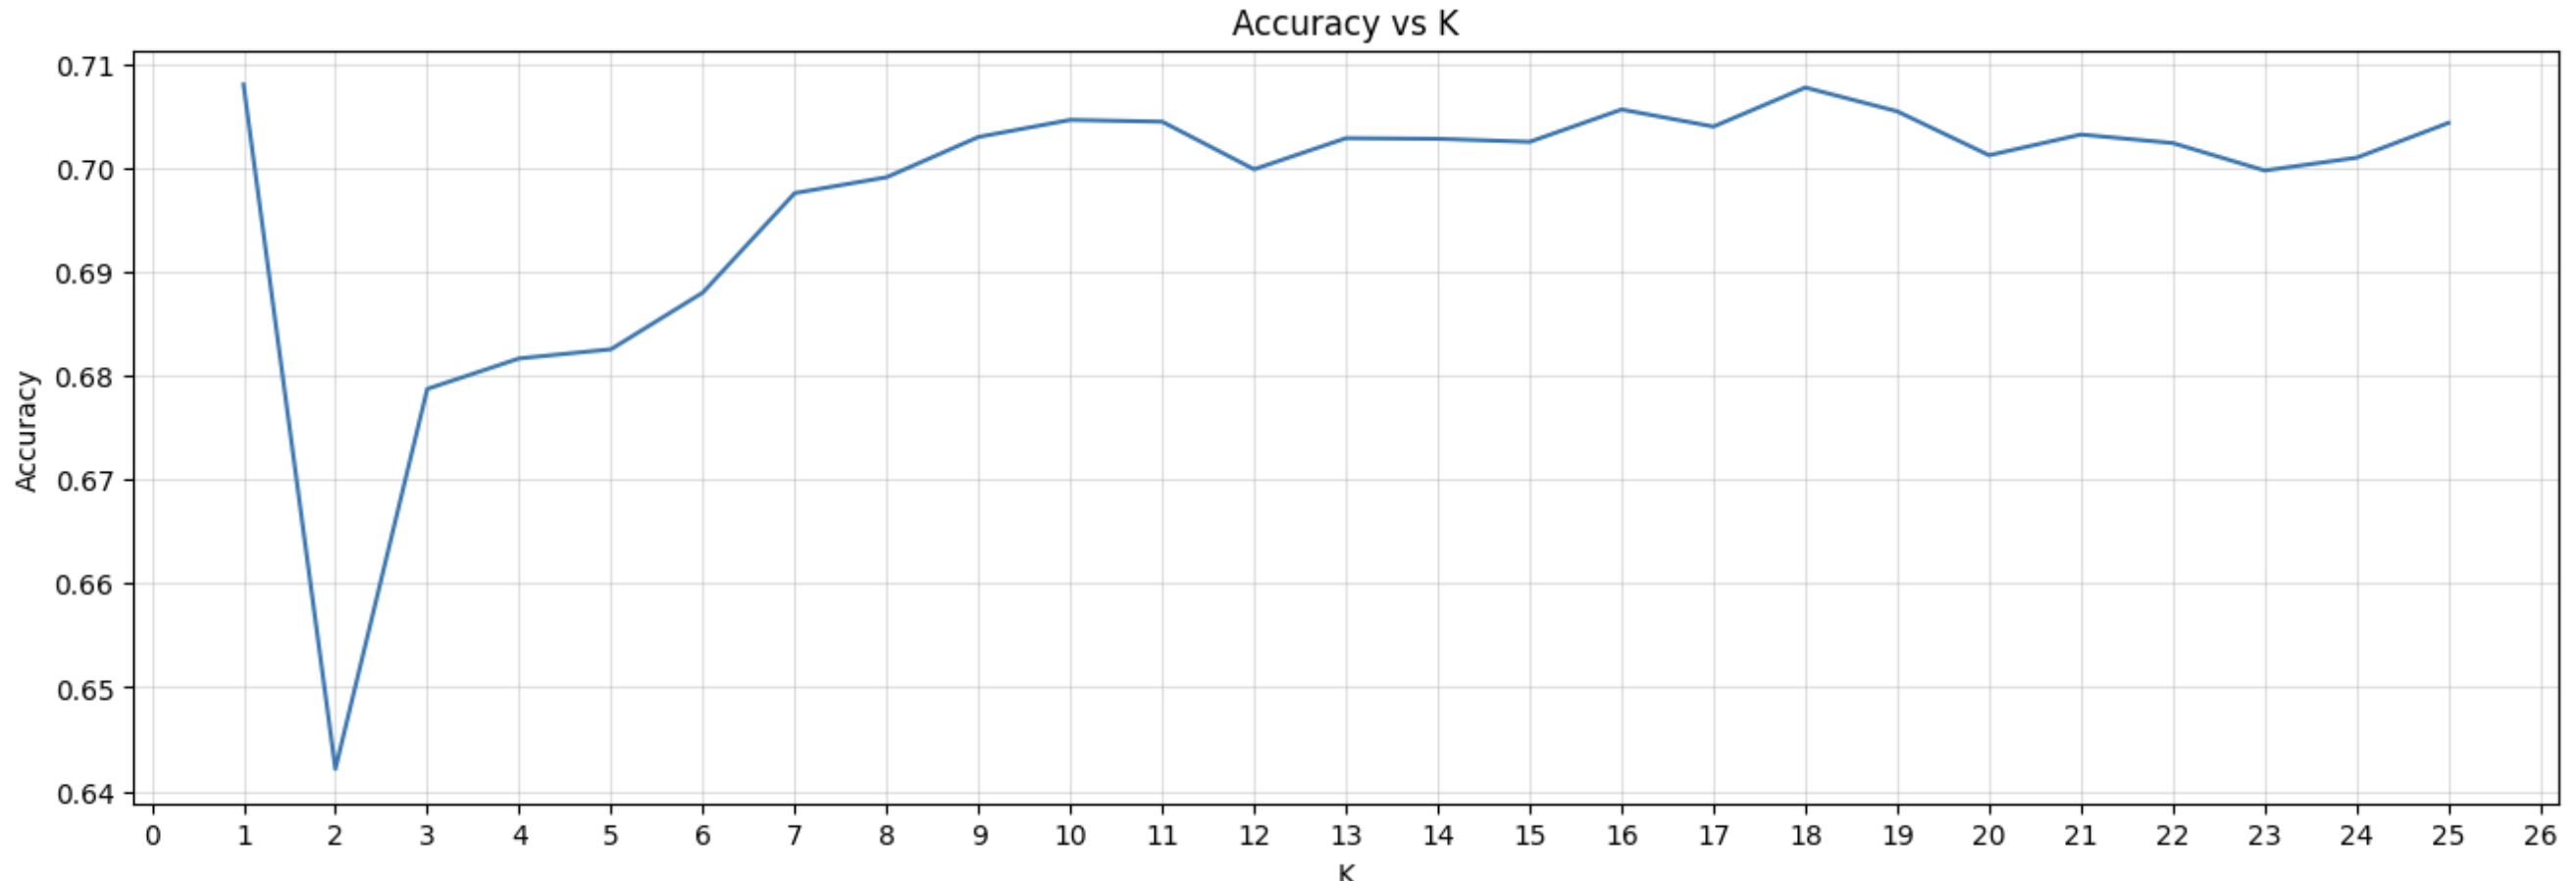

Con una sola variable que es ap_hi ya tiene accuracy 0.7, pero por mostrar mejor recall el K18 era buen candidato.

SVM

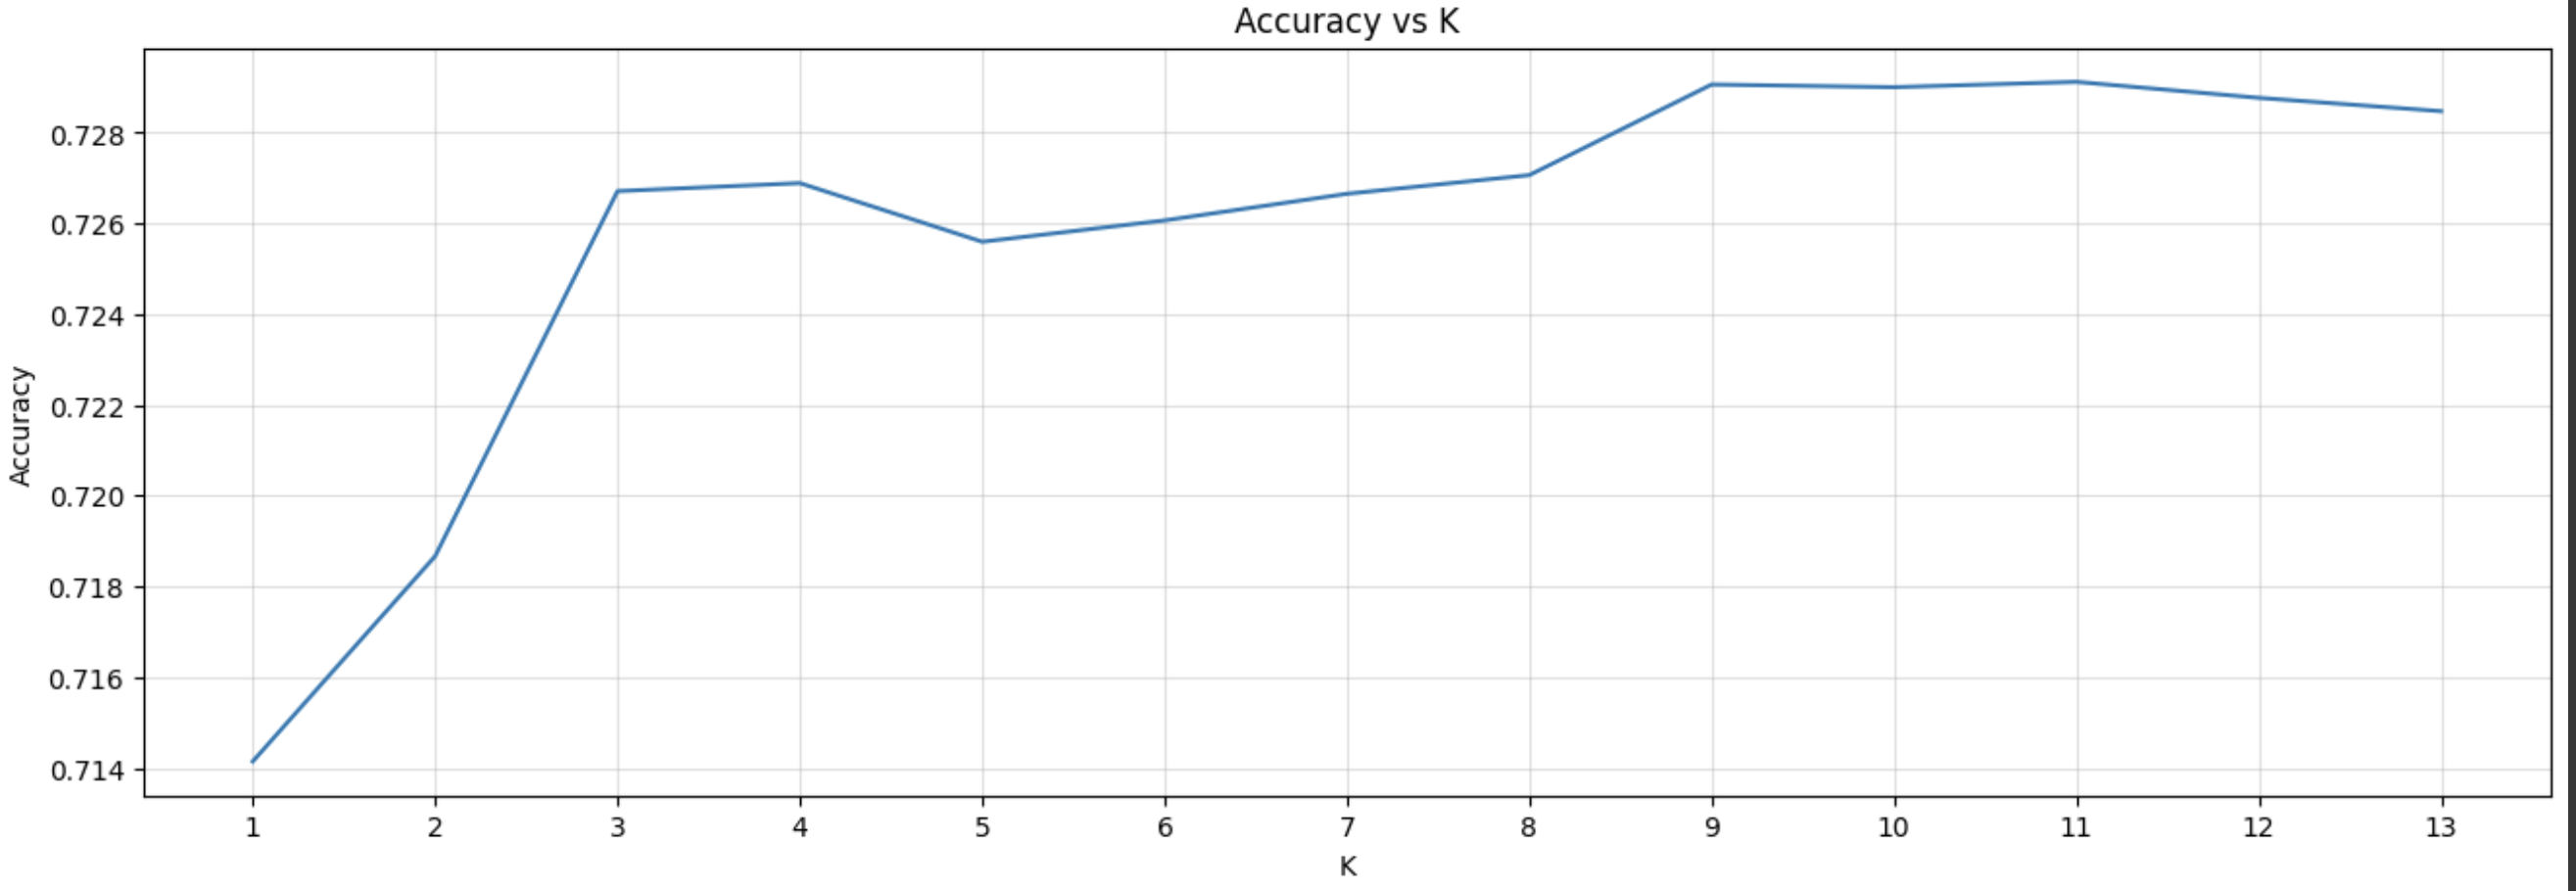

Este modelo resultó muy muy pesado y lento utilizando las variables codificadas con dummies por lo que opté por obtener en forma genérica sus mejores features y luego codificarlas una vez obtenidos el set de mejores. En este caso con 9.

KNN

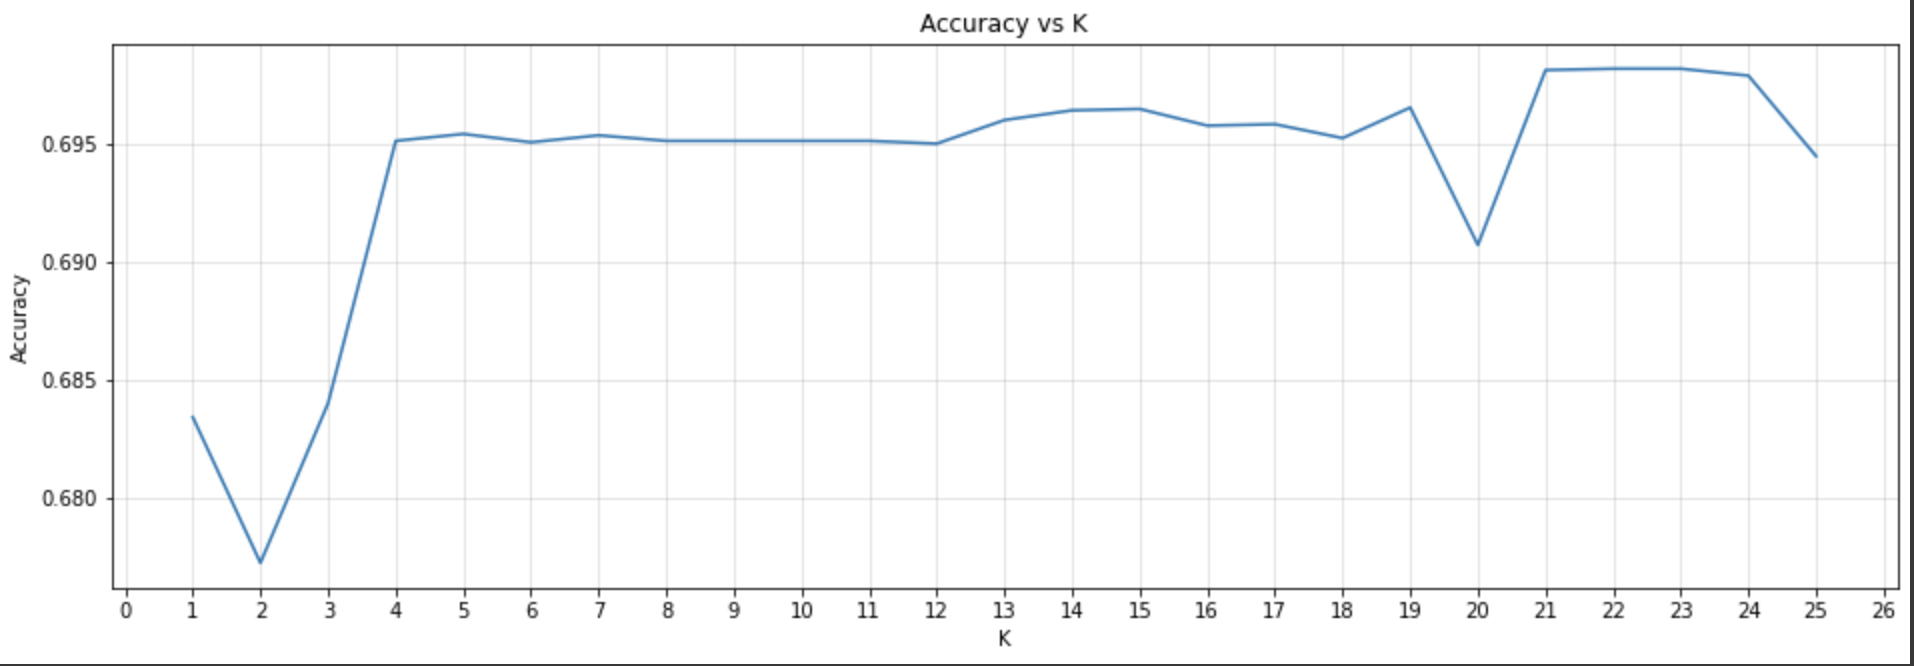

Es el de peor performance, el mejor accuracy es con 21 features pero está por debajo del 0.7.

Regresión Logística

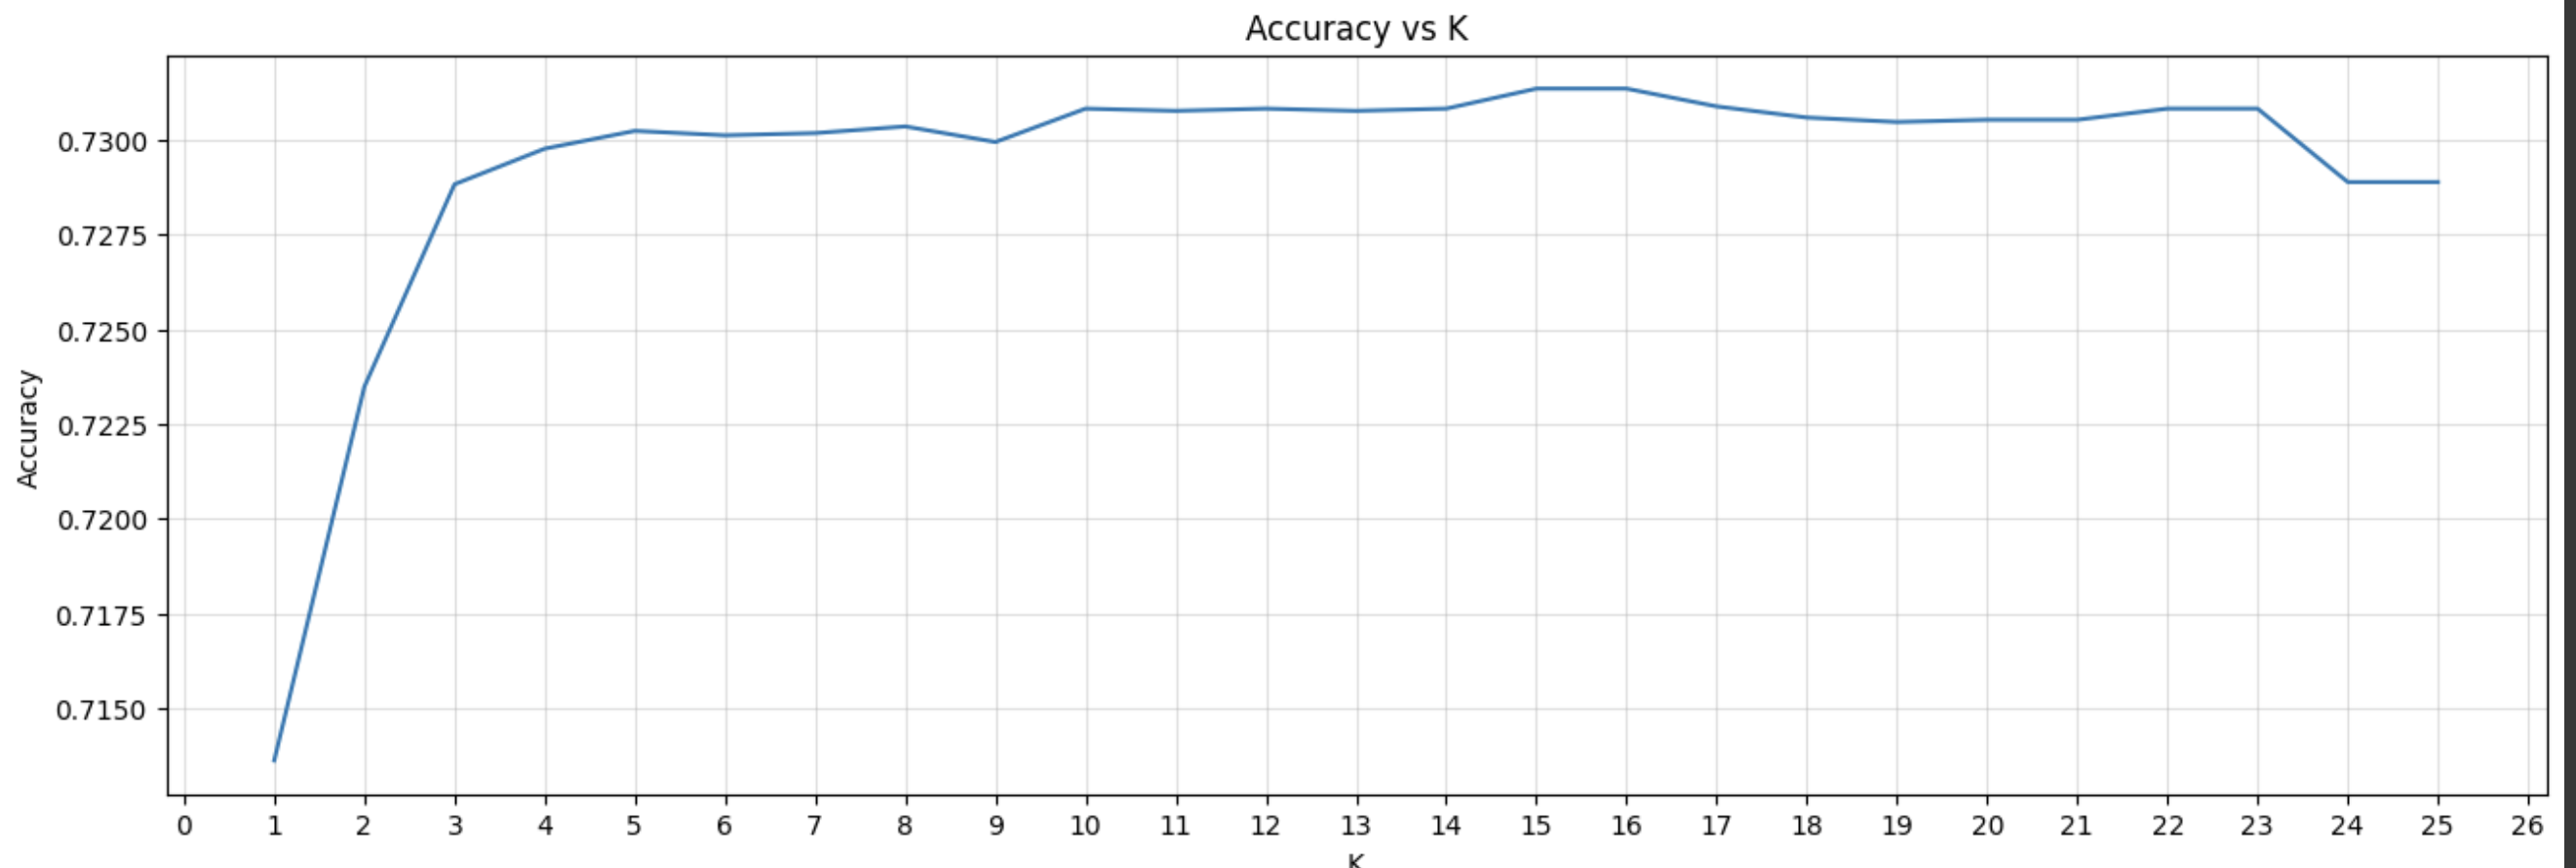

En este el mejor es con 15.

###2.-Mejor modelo con PCA

In [ ]:
#Normalizamos con la función StandardScaler

X_train_st = normalizar_variables_numericas(X_train, 'Standard')
X_test_st = normalizar_variables_numericas(X_test, 'Standard')

pca = PCA(n_components=12) #previamente ya he visto la varianza explicada y seleccioné 12 componentes
X_train = pca.fit_transform(X_train_st)
X_test = pca.transform(X_test_st)

In [ ]:
def PCA_model (model, label):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print (label)
  print('accuracy =', accuracy)
  print(classification_report(y_true=y_test,y_pred=y_pred))

In [ ]:
PCA_model(LogisticRegression(max_iter=1000), "PCA Regresion Logística")

PCA Regresion Logística
accuracy = 0.7270644896041348
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      8652
           1       0.75      0.67      0.71      8374

    accuracy                           0.73     17026
   macro avg       0.73      0.73      0.73     17026
weighted avg       0.73      0.73      0.73     17026



In [ ]:
PCA_model(SVC(), "PCA SVM")

PCA SVM
accuracy = 0.7352284740984377
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      8652
           1       0.76      0.68      0.72      8374

    accuracy                           0.74     17026
   macro avg       0.74      0.73      0.73     17026
weighted avg       0.74      0.74      0.73     17026



In [ ]:
PCA_model(RandomForestClassifier(max_depth=None, random_state=42), "PCA RandomForest")

PCA RandomForest
accuracy = 0.7157876189357454
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      8652
           1       0.71      0.71      0.71      8374

    accuracy                           0.72     17026
   macro avg       0.72      0.72      0.72     17026
weighted avg       0.72      0.72      0.72     17026



In [ ]:
PCA_model(KNeighborsClassifier(), "PCA KNN")

PCA KNN
accuracy = 0.7022201339128392
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      8652
           1       0.70      0.69      0.70      8374

    accuracy                           0.70     17026
   macro avg       0.70      0.70      0.70     17026
weighted avg       0.70      0.70      0.70     17026



###3.-Mejor modelo con variable sintética

Previamente, debido al proceso de visualización y análisis de los datos con EDA, ya hemos incluido una variable sintética IMC. Para esta etapa, y reconociendo que TODOS los procesos de features selection mostraron cómo primera variable a la presión sistólica, y mucho después a la presión diastólica decidí intentar con un parámetro utilizado en salud llamado PAM, que es presión arterial media. Esta es considerada mejor predictor de manejo de enfermedades críticas, cardiovasculares incluidas. Su fórmula es 1PS+2PD/3. Es algo así como un promedio. Sin embargo no obtuve mayor cambio en los resultados, practicamente son iguales por lo que decidí no incluir los resultados para no agregar más código.


Los modelos con las mejores métricas con validación simple son:


*   SVC con feature selection. Accuracy 0.735.
*   SVC con features obtenidas por PCA (12 componentes de 26 features originales). Accuracy 0.735.
*   Regresión Logística con mejores features(forward selection). Accuracy 0.731.

##Hypertunning de los 2 mejores

###1.-SVC con feature selection

In [ ]:
#Nos quedamos con los mejores feautures
data_1= df[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'chol', 'gluc', 'alco', 'active', 'cardio']]

#codificamos con dummies ya que en el feature selection lo utilizamos con la codificación base
df_enco= pd.get_dummies(data_1, columns=['chol', 'gluc', 'alco', 'active'])

# Separar en X y y
X= df_enco.drop(columns='cardio')
y= df_enco['cardio']

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

#Normalizamos con la función StandardScaler

X_train_st = normalizar_variables_numericas(X_train, 'Standard')
X_test_st = normalizar_variables_numericas(X_test, 'Standard')

#instanciamos el modelo y definimos el espacio de parámetros
model= SVC()
params_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# Ajustamos y elegimos los mejores parámetros para GridSearch
grid_cv = GridSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=2, verbose=1)
grid_cv.fit(X_train_st, y_train)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test_st)), 5)}')

Fitting 2 folds for each of 20 candidates, totalling 40 fits
Mejores Parametros {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Mejor CV score 0.732550162014026
Accuracy del modelo = 0.73464


Hice hypertunning para los distintos kernel, ya que requerían cruces específicos. Por ejemplo, el kernel 'poly' podía tener 'degree' pero los otros no, entonces hice distintas grillas, en total 7, utilizando GridSearch y HalvingRandomSearchCV, que se ajustaran a sus requerimientos. Finalmente la que presento aquí es la que dió mejor performance para el modelo utilizando SVC con las mejores variables.

###2.-SVC con PCA

In [ ]:
# Dividimos en train y test
X= df_encoding.drop(columns='cardio')
y= df_encoding['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

#Normalizamos con la función StandardScaler

X_train_st = normalizar_variables_numericas(X_train, 'Standard')
X_test_st = normalizar_variables_numericas(X_test, 'Standard')

#Aplicacion de PCA

pca = PCA(n_components=12)
X_train = pca.fit_transform(X_train_st)
X_test = pca.transform(X_test_st)

#instanciamos el modelo y definimos el espacio de parámetros
model= SVC()
params_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# Ajustamos y elegimos los mejores parámetros para GridSearch
grid_cv = GridSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Fitting 2 folds for each of 20 candidates, totalling 40 fits
Mejores Parametros {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Mejor CV score 0.732276056841453
Accuracy del modelo = 0.73552


En este caso también realice múltiples pruebas tanto con Gridsearch y HalvingRandom, colocando distintas grillas (8). Esta fue la que tuvo mejor performance. A su vez, también realicé hipertunning con el tercer mejor (Regresión Logística), pero probando muchas grillas y métodos los resultados fueron menores a SVC, por lo que descarté colocarlos en esta presentación.

Considerando estos 2, decidí colocar el 2º modelo(SVC PCA) cómo el mejor para hacer validación cruzada.

##Crossvalidation

In [ ]:
# Tomando en cuenta los X e y previo, normalizamos la X
X= normalizar_variables_numericas(X, 'Standard')

#Aplicamos PCA
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X)

# Creamos el procedimiento eligiendo Kfold ya que los datos están balanceados
model= SVC(C= 1, gamma = 0.1, kernel ='rbf')
scores= cross_val_score(model, X_pca, y, cv=7, verbose=1,scoring='accuracy')

#Imprimimos las métricas
print(f"Scores {scores}, promedio  {scores.mean()}")

Scores [0.73224381 0.73224381 0.73080481 0.73841094 0.73707473 0.73252467
 0.72851562], promedio  0.7331169117409813


##Conclusiones

Es posible obtener un accuracy aceptable, si bien disminuyó con la validación cruzada de lo obtenido la primera vez, esto debe haber respondido a la muestra de validación simple y las métricas finales son más seguras. A pesar de los esfuerzos por abarcar lo máximo posible en el proceso de hypertunning, probablemente la experiencia y la capacidad de computo pueden mejorar los resultados futuros.
En relación al problema a resolver, el modelo predictivo de ECV es bueno y bastante mejorable y puede significar un gran apoyo para la toma de desiciones tomando en cuenta la gran cantidad de datos disponibles actuales y que posiblemente estarán al alcance en un futuro cercano.